# <span id="chap_concepts_degree"></span> Degree

Having developed ideas of networks, nodes, and edges, we can start to ask questions about the properties of these elements, both individually and *en masse*. Together these properties form the topology of a network, which we can think of as its static structure. Later we'll see that this structure might not be static at all, but for the time being we'll assume that a network's topology is fixed at its creation.

Perhaps the most basic topological property of an individual node is its **degree**, by which we mean the number of other nodes to which it is adjacent. In general nodes may have any whole-numbered (integer) degree &ndash; including zero, for an **isolated** node that is not connected to any other.

## <span id="sec_concepts_degree_distribution"></span> Degree distribution

The degree of a node is clearly a **local** property: it applies to a single "location" (node) in the network. But there's also a **global** property implicit in this, in the ways in which degree varies across all the nodes in the network. It's intuitively clear that a given (simple) network will have a **minumum degree** equal to or greater than zero, and will also have a **maximum degree** &ndash; and the two might be the same, in some special cases.  This further sugfgests that we can bring together all the node degrees to form a **degree distribution**: the number of nodes having a particular degree in a given network. We can then study this distribution to see whether we can extract any meaningful properties from it. But the term "distribution" suggests a connection with statistics, which in turn suggests that there will be a **mean degree** and a **variance** between the degrees: statistical properties that concisely summarise the degree distribution.

## <span id="sec_concepts_degree_lattice"></span> Degree distribution of a lattice

Let us look at the degree distribution of the lattice networks we defined [earlier](concepts-networks.ipynb#sec_concepts_networks_lattice).

In [1]:
import networkx
import numpy

import cncp

import matplotlib as mpl
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import matplotlib.cm as cmap
import seaborn

/Users/sd/research/writing/complex-networks-complex-processes/notebook/cncp/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Firstly, we create a lattice of the desired size: 

In [2]:
mesh = cncp.lattice_graph(10, 10)

We can use `networkx` to extract the degrees of the nodes, and then use `numpy` to compute the maximal and minimal degrees of the network:

In [11]:
# extract the degrees of all the nodes in the mesh
dist = mesh.degree().values()

# compute the bounds and histogram
min_degree = min(dist)
max_degree = max(dist)

print "Minimum degree {min}, maximum degree {max}".format(min = min_degree,
                                                          max = max_degree)

Minimum degree 2, maximum degree 4


What about the degrees in between? The easiest way to look at degree distribution, at least for networks with only a moderate range of degrees, is with a histogram. To show how the degree distribution histogram is created, we'll draw the mesh with nodes coloured according to their degrees, and also plot the corresponding histogram of degrees:

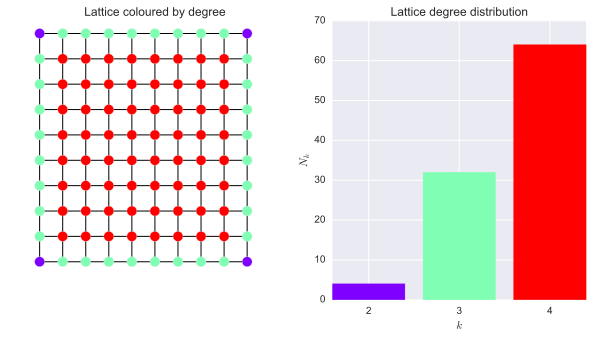

In [12]:
# build a histogram of degrees values
(hist, bins) = numpy.histogram(dist,
                               bins = range(min_degree, max_degree + 2))

# colour map we'll use for indicating the degree of a node
colour_map = plt.cm.rainbow

# draw the mesh, colouring the nodes according to their degree
fig = plt.figure(figsize = (10, 5))
ax1 = fig.add_subplot(1, 2, 1)
_ = ax1.set_title("Lattice coloured by degree")
_ = ax1.set_axis_off()
cncp.draw_lattice(mesh, ax = ax1, with_labels = False, node_size = 100,
                  node_color = dist, cmap = colour_map, vmin = min_degree, vmax = max_degree)
_ = ax1.set_xlim([-0.05, 1.05])
_ = ax1.set_ylim([-0.05, 1.05])

# draw the degree distribution histogram, colouring the bars
# to correspond to the colours of the mesh drawing
ax2 = fig.add_subplot(1, 2, 2)
_ = ax2.set_title("Lattice degree distribution")
_ = ax2.set_xticks(bins)
_ = ax2.set_xlabel("$k$")
_ = ax2.set_ylabel("$N_k$")
bars = ax2.bar(bins[:-1], hist, align = 'center')
for i in xrange(len(bars)):
    bars[i].set_color(colour_map((bins[i] - min_degree + 0.0) / (max_degree - min_degree)))
    
_ = plt.show()

(We usually use $k$ to denote degree.) The colours of the nodes in the lattice diagram correspond to the colours of the bars in the histogram. Most of the nodes have the (maximum) degree four, lying in the middle of the lattice. There are a smaller number of edge nodes with degree three, and an even smaller number (actually just the four corners) with (minimum) degree two.

## <span id="sec_concepts_degree_significance"></span> Degrees and probabilities

Why is degree distribution considered so critical? The degree of a node determines how many neighbours it has; the degree distribution controls the relative abundance of nodes with lots of neighbours, and so indirectly the likelihood that a node is neighbour to *another* node with lots of neighbours, and so forth.

The word "distribution" suggests a link to probability, and indeed we can view the degree distribution exactly like this: if we choose a node from the network at random, what is the probability that we will choose a node with a given degree (say, degree 2)? We can convert the number of nodes with degree $k$ into the probability that a randomly-chosen node has degree $k$ by dividing the number of nodes of degree $k$, denoted $N_k$, by the number of nodes in the network, $N$:

\begin{align*}
    P(k = 2) &= \frac{N_{2}}{N} = \frac{4}{100}  = 0.04 \\
    P(k = 3) &= \frac{N_{3}}{N} = \frac{32}{100} = 0.32 \\
    P(k = 4) &= \frac{N_{4}}{N} = \frac{64}{100} = 0.64
\end{align*}

So around two-thirds of nodes in this 10x10 lattice have degree 4. But there's more to it than that. The degree distribution controls whether the network is mainly made up of high-degree nodes, or of mainly low-degree nodes, or is somehow balanced between them. In a lattice, the majority of nodes have the maximum degree, and it's fairly easy to see that as the size of the lattice increases, the proportion of nodes with degree 4 gets larger and larger: lattices get more uniform as they get larger:

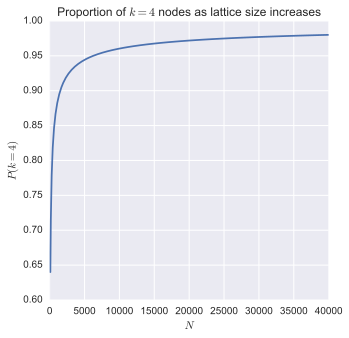

In [22]:
# the degrees we're interested in
ds = numpy.array(numpy.linspace(10, 200, dtype = numpy.int))  # lattice edge sizes
orders = ds * ds                                              # lattice orders

# create lattices and work out the fraction of degree-4 nodes
fourFraction = []
for d in ds:
    l = cncp.lattice_graph(d, d)
    dist = l.degree().values()                                # degrees of nodes
    fours = len([ k for k in dist if k == 4 ])                # number of degree-four nodes
    fourFraction.append((fours + 0.0) / l.order())            # fraction of degree-four nodes
    
fig = plt.figure(figsize = (5, 5))
plt.plot(orders, fourFraction)
plt.xlabel('$N$')
plt.ylabel('$P(k = 4)$')
plt.title('Proportion of $k = 4$ nodes as lattice size increases')
_ = plt.show()

(Clearly this is far from being the most efficient way of performing this computation. A moment's thought and a look at the coloured lattice diagram [above](#sec_concepts_degree_lattice) should convince you that the number of degree-$k$ nodes in a lattice with edge size $d$ (so $N = d \times d$) has a completely defined value that can be computed must faster than by creating lattices and then counting degrees. Specifically:

\begin{align*}
    N_4 &= (d - 2)^2 \\ 
    N_3 &= 4 (d - 2) \\
    N_2 &= 4
\end{align*}

and so:

\begin{align*}
    P(k = 4) &= \frac{(d - 2)^2}{N} \\ 
    P(k = 3) &= \frac{4(d - 2)}{N} \\
    P(k = 2) &= \frac{4}{N}
\end{align*}

But the principle remains the same, and for irregular networks there may be no better way than counting.)

## <span id="sec_concepts_degree_implications"></span> The implications of degree

But it's the interactions with other properties that make degree distribution perhaps the most critical single property of a network.

To see why, consider two networks with the same number of nodes where one has mainly high-degree nodes and one mainly low-degree nodes. Suppose further that we link nodes together randomly. If lots of nodes have high degree, then clearly each node will in general be linked to a higher proportion of nodes in the network than in the case where nodes have low degree. And this implies that nodes are "closer together": one in general has to traverse fewer edges to get between a given pair of nodes than in the low-degree case. So the degree distribution affects the average shortest path between any two nodes selected at random: the graph is likely to have a smaller [diameter](concepts-paths.ipynb#sec_concepts_paths_shortest). And *this* in turn is important, because (as we'll see later) a lot of processes that run over networks are critically affected by the diameter, since they can spread more efficiently through networks with low diameters. The degree distribution is the strongest contributor to diameter, although there are other contributing factors too.

## <span id="sec_concepts_degree_summary"></span> Degree summary statistics

[Earlier](#sec_concepts_degree_distribution) we noted that the node degrees in a network have a distribution, and that this suggests a link to statictics &ndash; and, in particular, to the use of summary statistics such as mean and variabce in describing the distribution of degrees. We'll conclude this chapter by exploring these ideas in the context of the lattice: we'll return to them extensively later.

The **mean degree** of a network is, as the name suggests, the mean (or average, or expected) value of the degree for a node chosen at random. We usually use $\langle k \rangle$ to denote the mean degree of a given network. Unlike the degree of a node, which must by definition always be an integer, the mean degree is a real number. As with any mean it has a **variance**. In statistical usage the variance is defined as the expected value of the square of the deviation of a random variable from the mean &ndash; which may not help very much in understanding it. For our current purposes, the variance is a measure how how "concentrated" the values of a distribution are about the mean, with large variance indicating that values "spread out" widely. 

We can easily compute $\langle k \rangle$ by extracting the node degrees for all nodes and then using `numpy`'s standard implementations for mean and variance:

In [27]:
ds = numpy.array(mesh.degree().values())
print 'Mean degree {kmean}, variance {kvar}'.format(kmean = numpy.mean(ds),
                                                    kvar = numpy.var(ds))

Mean degree 3.6, variance 0.32


This tells us that the mean degree of a mesh is close to 4: we'd expect that, given the preponderance of degree-four nodes in *any* lattice. The variance tells us that the mean of the square of the deviation from this value will be 0.32, so the expected deviation is about 0.6 ($\sqrt{0.32} \approx 0.57$): again, nothing surprising given that the next most popular species of nodes has degree 3.

We could also ask what other summary statistics give us information about the degree distribution. The **modal value** of the distribution is the most commonly-observed value &ndash; four in our case &ndash; which in this case also corresponds to the maximum degree of the network. We'll defer consideration of further summary statistics until we encounter more interesting degree distributions, for which such values may be more illuminating. 